Ionosphere Data Problem

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
print (tf.__version__)

2.4.1


# Load Data

In [2]:
data=pd.read_csv("/content/ionosphere_data.csv")

# Data Analysis

In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
data.shape

(351, 35)

There are 35 Columns. 34 Columns have features and Last Column is the Label with (g = good and b = bad). 351 Rows of data each.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

# Data Cleaning

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


Unique Features

In [7]:
for features in data:
    print(features)
    print(len(data[features].unique()))

feature1
2
feature2
1
feature3
219
feature4
269
feature5
204
feature6
259
feature7
231
feature8
260
feature9
244
feature10
267
feature11
246
feature12
269
feature13
238
feature14
266
feature15
234
feature16
270
feature17
254
feature18
280
feature19
254
feature20
266
feature21
248
feature22
265
feature23
248
feature24
264
feature25
256
feature26
273
feature27
256
feature28
281
feature29
244
feature30
266
feature31
243
feature32
263
feature33
245
feature34
263
label
2


Feature 2 has only 1 value Hence it needs to be dropped. 

In [8]:
data.drop(data.columns[1], inplace=True, axis=1)

In [9]:
#checking for duplicates and removing them. 
#data.duplicated().sum()

In [10]:
#data.drop_duplicates(inplace=True)

In [11]:
data.shape

(351, 34)

Check Missing Values (If Any)

In [12]:
data.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

No Missing Values in Dataset

Change Labels (Good / Bad to 1 / 0) via One Hot Encode

In [13]:
data['label'].value_counts()

g    225
b    126
Name: label, dtype: int64

In [14]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'g' else 0)

Normalize the data

In [16]:
scaler = MinMaxScaler()
data.iloc[:, 2:-1] = scaler.fit_transform(data.iloc[:, 2:-1]) 
data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,0.926215,0.411225,0.798775,0.275275,0.802680,0.308885,0.921780,0.307290,0.791060,0.339040,0.784855,0.351630,0.684730,0.263215,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500,1
1,1,1.00000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,0.754370,0.161285,0.672160,0.151465,0.241575,0.012425,0.527495,0.188815,0.665545,0.000000,0.434245,0.273500,0.409720,0.321330,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765,0
2,1,1.00000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,0.865410,0.526730,0.927215,0.504135,0.772955,0.501495,0.918875,0.431780,0.877675,0.457300,0.854435,0.362490,0.716925,0.439690,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810,1
3,1,1.00000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.572580,0.770470,0.303350,0.000000,0.227665,0.150125,1.000000,0.500000,0.500000,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000,0
4,1,1.00000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,0.763990,0.398625,0.782045,0.496440,0.671975,0.362715,0.764700,0.391100,0.725535,0.410935,0.529910,0.322125,0.511545,0.235605,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515,1


#shuffle & Split the data 60% (Training) & 40% (Testing)


In [17]:
training_data = data.sample(frac= 0.6, random_state=125)
testing_data = data.drop(training_data.index)

In [18]:
training_label = training_data.iloc[:,-1]
training_data = training_data.iloc[:,0:-1]
testing_label = testing_data.iloc[:,-1]
testing_data = testing_data.iloc[:,0:-1]


In [19]:
training_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
270,1,1.00000,0.540065,0.983875,0.497590,0.983415,0.496390,0.93990,0.480385,1.00000,0.507095,0.980930,0.492820,0.979735,0.491645,0.992485,0.505010,0.955760,0.455760,0.975080,0.488180,0.973180,0.487045,0.990820,0.510015,0.968860,0.484830,1.000000,0.470785,0.963870,0.482680,0.96113,0.481635
116,1,1.00000,0.426230,1.000000,0.524590,0.786885,0.491805,0.82787,0.508195,0.92623,0.483605,0.860655,0.500000,0.844260,0.418035,0.598360,0.426230,0.827790,0.414120,0.836065,0.516395,1.000000,0.352460,0.655740,0.327870,0.761925,0.398375,0.663935,0.483605,0.639345,0.278690,0.74590,0.467215
135,1,0.89706,0.691175,0.955880,0.687500,0.871325,0.838235,0.72794,0.889705,0.59559,0.944855,0.488970,0.930145,0.397060,0.911765,0.312500,0.838235,0.250000,0.738970,0.132355,0.691175,0.069855,0.544120,0.128675,0.437500,0.160375,0.379345,0.224265,0.286765,0.279410,0.246325,0.35662,0.216910
91,1,0.84557,0.457100,0.341275,0.097235,0.455195,0.217825,0.90324,0.522880,0.94757,0.496185,0.407530,0.819830,0.399905,0.159675,0.928505,0.443280,0.889895,0.421355,0.465205,0.754050,0.329360,0.904670,0.894660,0.481410,0.854410,0.373560,0.889420,0.429455,0.393230,0.109150,0.40753,0.200665
100,1,1.00000,0.000000,0.500000,0.500000,0.889705,0.003675,0.90441,0.775735,0.29044,0.025735,0.500000,0.500000,0.500000,0.500000,0.860295,0.113970,0.867645,0.198530,0.500000,0.500000,0.591910,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.50000,0.500000


Checking Data before Pre-Processing & Model

In [20]:
training_data.shape

(211, 33)

In [21]:
training_label.shape

(211,)

In [22]:
testing_data.shape

(140, 33)

In [23]:
testing_label.shape

(140,)

In [24]:
len(training_label)

211

Data Pre-processing

In [25]:
training_data = training_data.to_numpy()

In [26]:
training_label = training_label.to_numpy().astype('float32')

In [27]:
testing_data = testing_data.to_numpy()

In [28]:
testing_label = testing_label.to_numpy().astype('float32')

Model

In [29]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(training_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2176      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [31]:
model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(training_data, training_label, validation_split=0.3, epochs=100, batch_size = 20)

Epoch 1/100
8/8 [==============================] - 1s 83ms/step - loss: 0.8435 - accuracy: 0.4670 - val_loss: 0.5707 - val_accuracy: 0.7188
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6103 - accuracy: 0.6585 - val_loss: 0.5181 - val_accuracy: 0.7031
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5622 - accuracy: 0.7215 - val_loss: 0.4983 - val_accuracy: 0.7031
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5258 - accuracy: 0.7427 - val_loss: 0.4668 - val_accuracy: 0.7969
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.7394 - val_loss: 0.4411 - val_accuracy: 0.7500
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4631 - accuracy: 0.7741 - val_loss: 0.4148 - val_accuracy: 0.7969
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4516 - accuracy: 0.8414 - val_loss: 0.3851 - val_accuracy: 0.8125
Epoch 8/100
8/8 [========

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

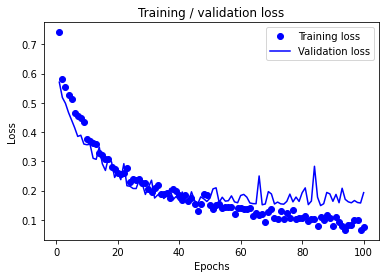

In [34]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training / validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

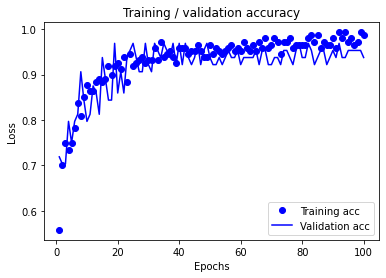

In [35]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training / validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation & Prediction

In [36]:
accuracy_score = model.evaluate(testing_data, testing_label, batch_size=10)
print('accuracy score ', accuracy_score[1] * 100, '%')

14/14 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8929
accuracy score  89.28571343421936 %


In [37]:
pred_score = model.predict(testing_data)

In [39]:
pred_label = (pred_score > 0.5)
tf.math.confusion_matrix(
    testing_label, pred_label, num_classes=2, weights=None, dtype=tf.dtypes.int32,name=None)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40, 15],
       [ 0, 85]], dtype=int32)>

In [40]:
np.count_nonzero(pred_label)

100